In [1]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join(r'C:\Users\AL-Renad\Downloads\da1\horses')

# Directory with training human pictures
train_human_dir = os.path.join(r'C:\Users\AL-Renad\Downloads\da1\humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join(r'C:\Users\AL-Renad\Downloads\da\horses')

# Directory with validation human pictures
validation_human_dir = os.path.join(r'C:\Users\AL-Renad\Downloads\da\humans')

In [2]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_hames = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_hames[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
TRAIN SET HUMANS: ['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
VAL SET HORSES: ['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
VAL SET HUMANS: ['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


In [3]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

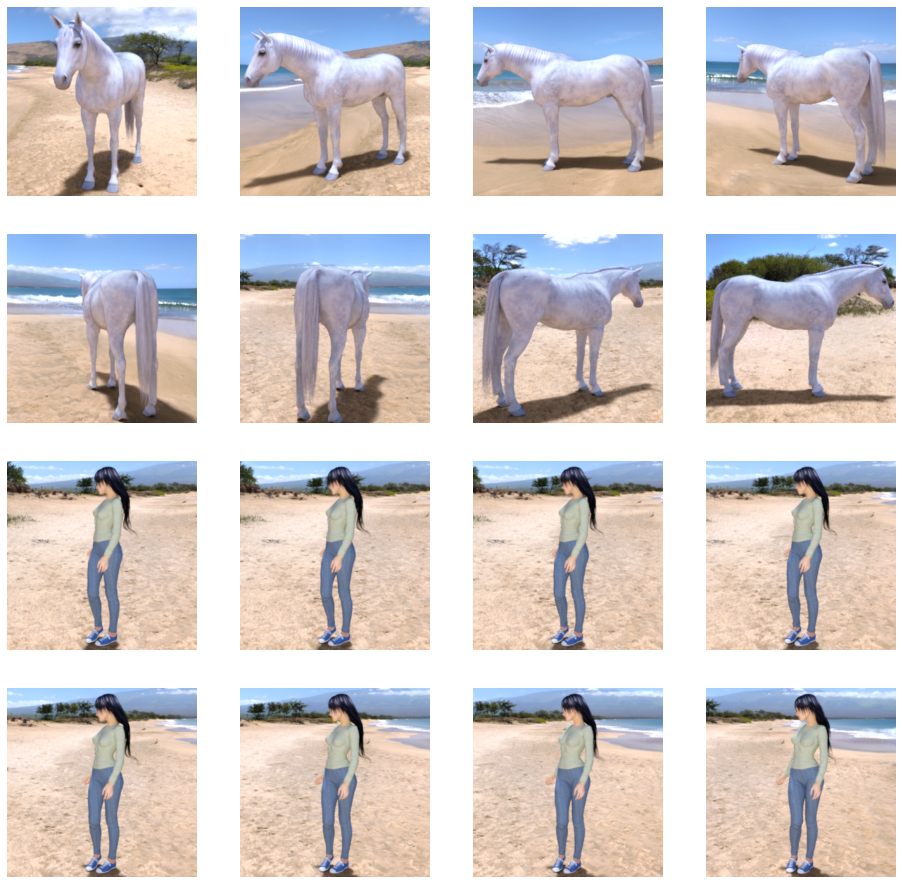

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rotation_range = 30,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5),rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        r'C:\Users\AL-Renad\Downloads\da1',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 300x300
        batch_size=50,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        r'C:\Users\AL-Renad\Downloads\da',  # This is the source directory for validation images
        target_size=(150, 150),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [6]:
import tensorflow as tf

mobile=tf.keras.applications.mobilenet.MobileNet()

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=r'C:\Users\AL-Renad\Downloads\da1',target_size=(224,224),batch_size=15,class_mode='binary')
validation_generator=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=r'C:\Users\AL-Renad\Downloads\da',target_size=(224,244),batch_size=15,class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

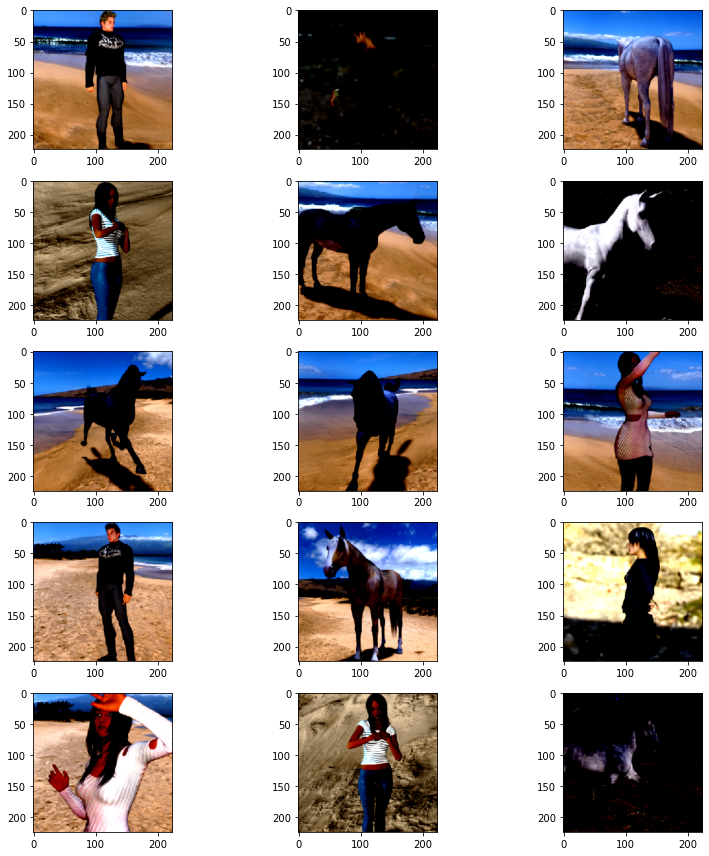

In [26]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [27]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [28]:
type(mobile)
from tensorflow import keras

In [57]:
model=tf.keras.Sequential()
for layer in mobile.layers[:-1]:
    model.add(layer)

In [58]:
for layer in model.layers:
    layer.trainable=False

In [59]:
#odel.add(keras.layers.Dense(128,activation='relu'))
#odel.add(keras.layers.BatchNormalization())
#odel.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation="sigmoid"))

In [60]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                          
                                                                 
 conv_dw_1_relu (ReLU)       (None, 112, 112, 32)     

In [61]:
from keras.optimizers import Adam
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [62]:
fitt = model.fit(
      train_generator, 
      epochs=10,
      verbose=1,
      validation_data = validation_generator)

Epoch 1/10
69/69 [==============================] - 39s 527ms/step - loss: 0.1675 - accuracy: 0.9348 - val_loss: 0.0710 - val_accuracy: 0.9688
Epoch 2/10
69/69 [==============================] - 35s 511ms/step - loss: 0.0387 - accuracy: 0.9893 - val_loss: 0.0519 - val_accuracy: 0.9844
Epoch 3/10
69/69 [==============================] - 34s 495ms/step - loss: 0.0208 - accuracy: 0.9951 - val_loss: 0.0552 - val_accuracy: 0.9805
Epoch 4/10
69/69 [==============================] - 34s 494ms/step - loss: 0.0217 - accuracy: 0.9922 - val_loss: 0.0489 - val_accuracy: 0.9844
Epoch 5/10
69/69 [==============================] - 34s 492ms/step - loss: 0.0125 - accuracy: 0.9981 - val_loss: 0.0330 - val_accuracy: 0.9844
Epoch 6/10
69/69 [==============================] - 34s 496ms/step - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.0246 - val_accuracy: 0.9883
Epoch 7/10
69/69 [==============================] - 34s 495ms/step - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.0230 - val_accuracy: 0.9883

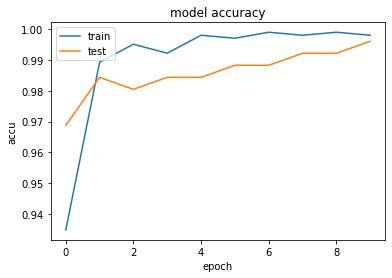

In [64]:
plt.plot(fitt.history['accuracy'])
plt.plot(fitt.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accu')
plt.legend(['train','test'],loc='upper left')
plt.show()

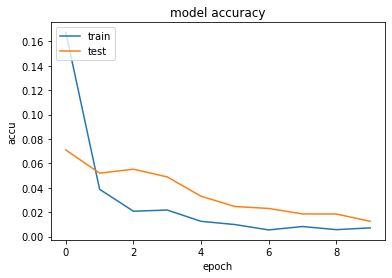

In [65]:
plt.plot(fitt.history['loss'])
plt.plot(fitt.history['val_loss'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accu')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [17]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(80, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.3),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])
from keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 100)     2800      
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 100)    400       
 ormalization)                                                   
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 100)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 80)        72080     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 80)       320       
 hNormalization)                                                 
                                                      

In [18]:
history = model.fit(
      train_generator, 
      epochs=20,
      verbose=1,
      validation_data = validation_generator)

Epoch 1/20
21/21 [==============================] - 141s 7s/step - loss: 0.3602 - accuracy: 0.8500 - val_loss: 0.6386 - val_accuracy: 0.5000
Epoch 2/20
21/21 [==============================] - 120s 6s/step - loss: 0.1606 - accuracy: 0.9309 - val_loss: 0.8318 - val_accuracy: 0.5000
Epoch 3/20
21/21 [==============================] - 119s 6s/step - loss: 0.1426 - accuracy: 0.9387 - val_loss: 0.7754 - val_accuracy: 0.5039
Epoch 4/20
21/21 [==============================] - 116s 5s/step - loss: 0.0918 - accuracy: 0.9659 - val_loss: 0.7137 - val_accuracy: 0.5117
Epoch 5/20
21/21 [==============================] - 114s 5s/step - loss: 0.0818 - accuracy: 0.9708 - val_loss: 0.5790 - val_accuracy: 0.6016
Epoch 6/20
21/21 [==============================] - 111s 5s/step - loss: 0.0738 - accuracy: 0.9737 - val_loss: 0.4890 - val_accuracy: 0.7656
Epoch 7/20
21/21 [==============================] - 121s 6s/step - loss: 0.0448 - accuracy: 0.9883 - val_loss: 0.4333 - val_accuracy: 0.9062
Epoch 8/20
21

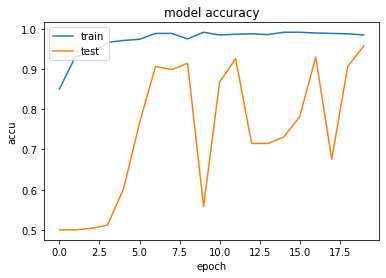

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accu')
plt.legend(['train','test'],loc='upper left')
plt.show()

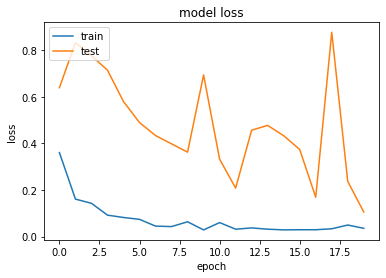

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel("loss")
plt.legend(['train','test'],loc='upper left')

In [74]:
# # CODE BLOCK FOR SAFARI USERS

import numpy as np
from keras.utils import load_img, img_to_array
import os

images = os.listdir(r"C:\Users\AL-Renad\Documents\pre")

print(images)

for i in images:
    print(i)
            # predicting images
    path = 'C:\\Users\\AL-Renad\\Documents\\pre\\'+i
    img = load_img(path, target_size=(150, 150))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(i + " is a human")
    else:
        print(i + " is a horse")

['aa.jpg', 'o.jpg', 'R.jpeg', 't.jpg', 'w.jpg', 'y.jpeg']
aa.jpg
1/1 [==============================] - 0s 90ms/step
[0.9999857]
aa.jpg is a human
o.jpg
1/1 [==============================] - 0s 50ms/step
[0.00085506]
o.jpg is a horse
R.jpeg
1/1 [==============================] - 0s 50ms/step
[0.0013577]
R.jpeg is a horse
t.jpg
1/1 [==============================] - 0s 59ms/step
[0.00199137]
t.jpg is a horse
w.jpg
1/1 [==============================] - 0s 60ms/step
[0.04233349]
w.jpg is a horse
y.jpeg
1/1 [==============================] - 0s 55ms/step
[0.29842934]
y.jpeg is a horse


1/1 [==============================] - 0s 236ms/step


C:\Users\AL-Renad\AppData\Local\Temp\ipykernel_14680\605351535.py:45: RuntimeWarning: divide by zero encountered in true_divide
  x /= x.std()
C:\Users\AL-Renad\AppData\Local\Temp\ipykernel_14680\605351535.py:45: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


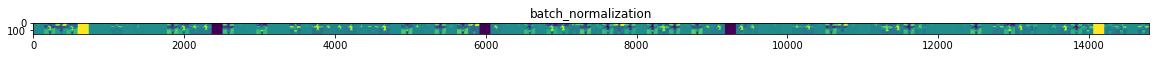

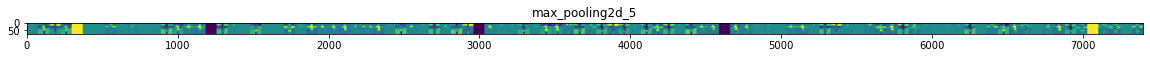

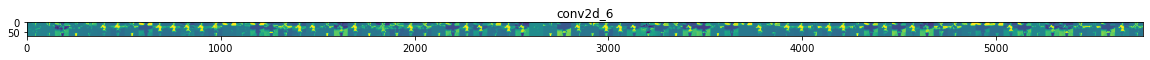

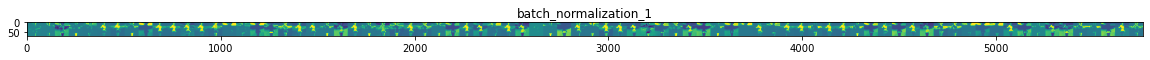

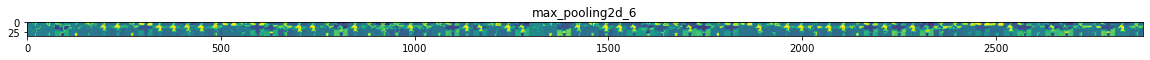

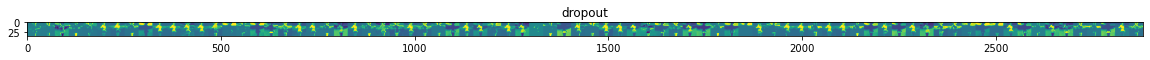

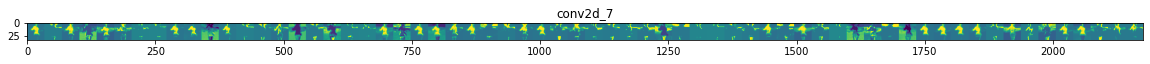

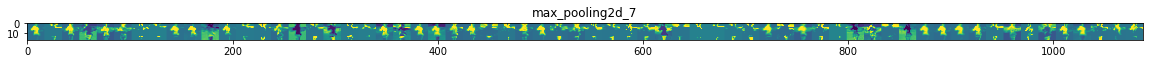

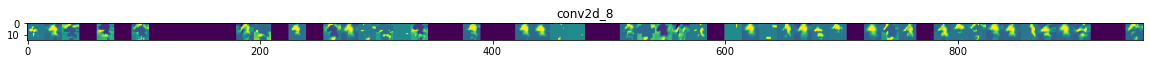

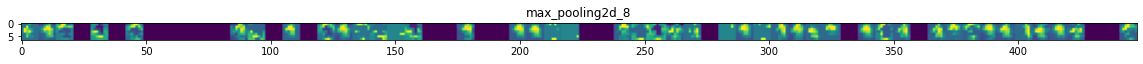

In [76]:
import numpy as np
import random
from keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')